In [1]:
from scipy import stats

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Paired-TTest

# Simulating P-values

Suppose you've read that 10% of the nation has coronavirus. You want to prove that in your school, you have a higher average.

To test your theory, you tested 40 people and observed that ~18% had coronavirus.

To see how likely a sample like this was to happen by chance, you perform a simulation: generate a simulation to test how likely it is to obtain a 18% proportion if the true proportion was indeed 10%. Run several tests and check how many times your results corroborates to your observation.

P(A | B)

alpha --> 0.05  (significance level = 1-alpha = 95%)

In [3]:
sample_01 = np.random.choice([0, 1], p=[0.9, 0.1], size=40)

In [4]:
sample_01.mean()

0.1

In [13]:
dist_pop = np.array([np.mean(np.random.choice([0, 1], p=[0.9, 0.1], size=40)) for i in range(0, 1000)])

In [14]:
np.mean(dist_pop >= 0.18) # nível de signficância de 0.05

0.039

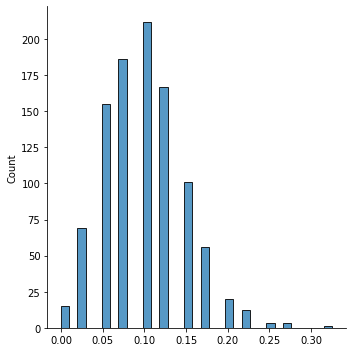

In [15]:
sns.displot(dist_pop)

That's what the p-value represents. If the distribution was indeed ~10%, you would only find values >= 18% in 5% of the times.

In [16]:
from scipy import stats

In [20]:
samp_school = np.random.choice([0, 1], size=100, p=[0.82, 0.18])

In [21]:
np.mean(samp_school)

0.21

In [22]:
stats.ttest_1samp(samp_school, 0.10)

Ttest_1sampResult(statistic=2.687120173756612, pvalue=0.008454710767366877)

# Applications of Hypothesis Testing

In [24]:
!pip install researchpy

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy import stats
import researchpy as rp

https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv

This dataset contains blood pressure readings before and after an <b>intervention</b>. These are variables “bp_before” and “bp_after”.

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv')

In [27]:
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


## The hypothesis being tested

* __Null hypothesis (H0): u1 = u2, which translates to the mean of sample 01 is equal to the mean of sample 02__
* __Alternative hypothesis (H1): u1 != u2, which translates to the means of sample 01 is not equal to sample 02__ 

## Assumption check 

- [ ]  The samples are independently and randomly drawn
- [x]  The distribution of the residuals between the two groups should follow the normal distribution
- [ ]  The variances between the two groups are equal

### Checking Normal distribution by Q-Q plot graph
https://www.statisticshowto.datasciencecentral.com/assumption-of-normality-test/

In [28]:
df['diff_'] = df.bp_before-df.bp_after

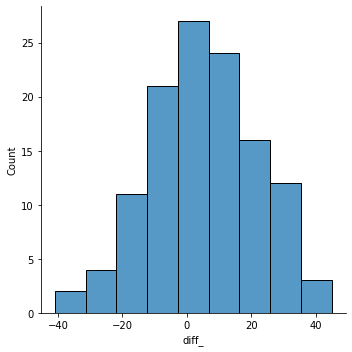

In [29]:
sns.displot(df.diff_)

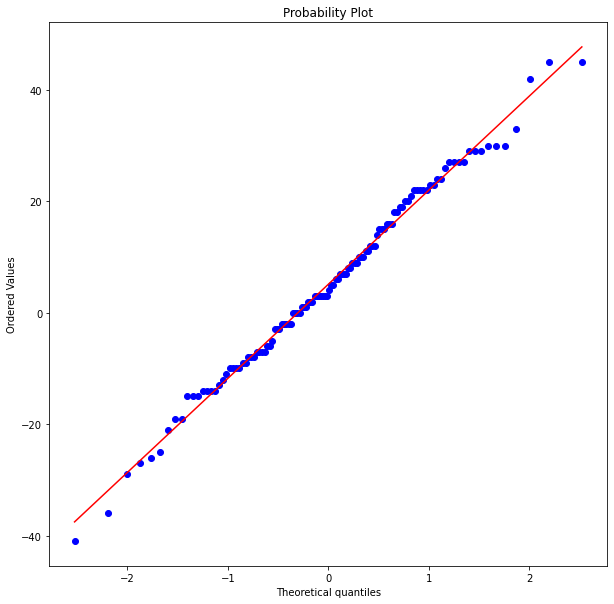

In [30]:
plt.figure(figsize=(10,10))
stats.probplot(df.diff_, plot=plt)
plt.show()

**Note:-** The corresponding points lies very close to line that means are our sample data sets are normally distributed

### Checking Normal distribution by method of `Shapiro stats`
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [31]:
stats.shapiro(df.diff_)

ShapiroResult(statistic=0.9926842451095581, pvalue=0.7841846942901611)

In [32]:
df.bp_after.var()

201.00497198879552

In [33]:
df.bp_before.var()

129.72857142857143

In [34]:
stats.levene(df.bp_after, df.bp_before)

LeveneResult(statistic=4.863729003161597, pvalue=0.028383666362347747)

---

In [35]:
df[['bp_before', 'bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


<AxesSubplot:ylabel='Frequency'>

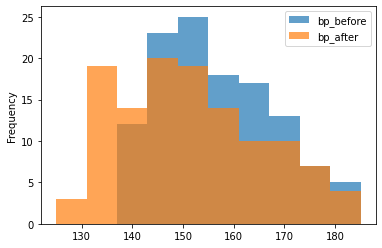

In [36]:
df[['bp_before', 'bp_after']].plot(kind='hist', alpha=0.7)

<AxesSubplot:>

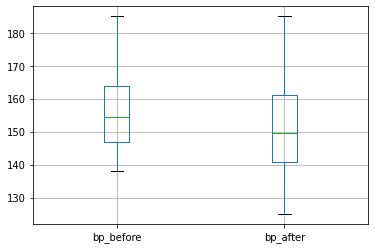

In [37]:
df[['bp_before', 'bp_after']].boxplot()

In [38]:
stats.ttest_rel(df.bp_before, df.bp_after)

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

In [39]:
stats.ttest_1samp(df.bp_before-df.bp_after, 0)

Ttest_1sampResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

Como p-value < 0.05 (0.001), isso significa que eu posso rejeitar a hipótese nula de que mean(bp_reading['bp_after']) == mean(bp_reading['bp_before'])